<a href="https://colab.research.google.com/github/hkaragah/google_colab_repo/blob/main/hands_on_ml_exercises/09_unsupervised_learning_k_means_optimal_number_of_clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means

__Disclaimer:__ This exercise is adopted from `"Hands-on Machine Learning with Scikit-Learn, Keras & Tensorflow (Third Edition)"` book written by `_Aurelien Geron_` publoshed by `_O'Reilly_`. I broke them down into smaller digestable snippets, made some modifications, and added some explanations so that I can undersatand them better. The porpuse of this notebook is just for me to understand the concept and have hands-on practice while reading the book material.

## Objective
Finding optimal number of clusters using K-means
* Elbow method
* Silhouette score

## Import Dependencies

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, silhouette_score

from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

# Create Dataset

In [2]:
bolb_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8], [-2.8,  2.8], [-2.8,  1.3]])
bolb_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=bolb_centers, cluster_std=bolb_std, random_state=7)

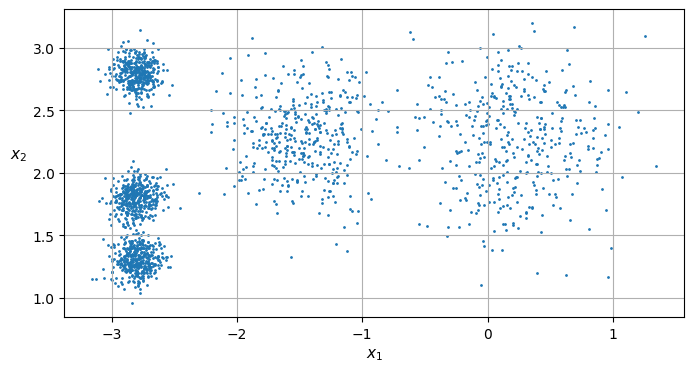

In [3]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=11)
    plt.ylabel("$x_2$", fontsize=11, rotation=0, labelpad=10)


plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.grid(True)
plt.show()

# K-Means clustering

In [14]:
# Three clusters
k = 3
kmeans_1 = KMeans(n_clusters=k, n_init=10, random_state=42)
y_pred_1 = kmeans_1.fit_predict(X)

In [15]:
# Eight clusters
k = 8
kmeans_2 = KMeans(n_clusters=k, n_init=10, random_state=42)
y_pred_2 = kmeans_2.fit_predict(X)

## 1. Clusters

In [6]:
def plot_centroids(centroids, ax, weights=None, circle_color='w', cross_color='r'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    ax.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    ax.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)


def plot_data(X, ax):
    ax.plot(X[:, 0], X[:, 1], 'k.', markersize=2)


def plot_decision_boundaries(clusterer, X, ax, resolution=1000, show_centroids=True, show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution), np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), cmap="coolwarm") #plot field
    ax.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=0.5, colors='k') #plot boundaries
    plot_data(X, ax)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_, ax)
    if show_xlabels:
        ax.set_xlabel("$x_1$", fontsize=11)
    else:
        ax.tick_params(labelbottom=False)
    if show_ylabels:
        ax.set_ylabel("$x_2$", fontsize=11, rotation=0, labelpad=10)
    else:
        ax.tick_params(labelleft=False)

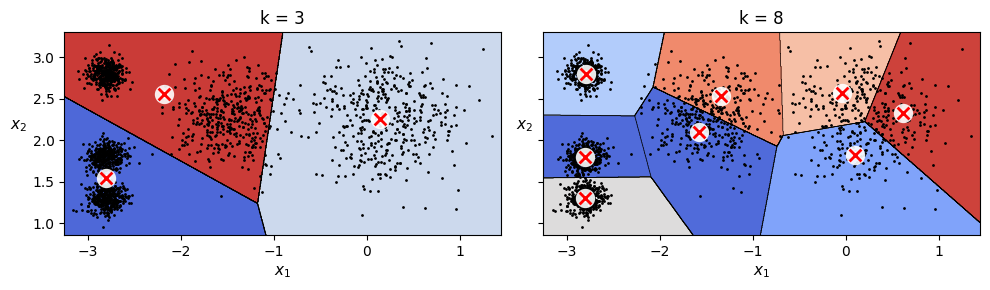

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 3), sharey=True)
plot_decision_boundaries(kmeans_1, X, ax[0])
ax[0].set_title('k = 3')
plot_decision_boundaries(kmeans_2, X, ax[1])
ax[1].set_title('k = 8')
plt.tight_layout()
plt.show()

## 2. Optimum Number of Cluster: Elbow Method

In [22]:
kmeans_models = [KMeans(n_clusters=k, n_init=10, random_state=42) for k in range(2, 11)]
inertias = [model.fit(X).inertia_ for model in kmeans_models]

The __inertia__ of the model is sum of the squared distances of samples to their closest cluster center, weighted by the sample weights. The lower the inertia, the closest the overall instance's distance to theirassigned clusters. If `n_clusters` is too small, separate clusters get merged. On the other hand, if k is too large, some clusters get chopped into multiple pieces.

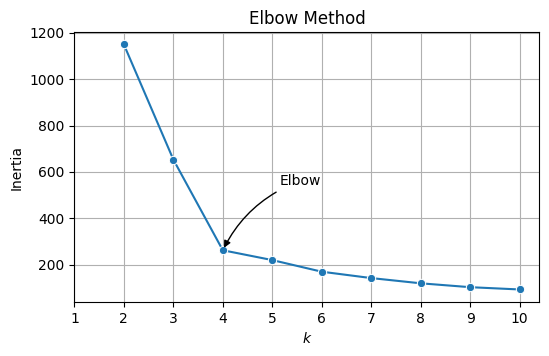

In [51]:
plt.figure(figsize=(6, 3.5))
sns.lineplot(x=range(2, 11), y=inertias, marker='o')
plt.xlabel('$k$', fontsize=10)
plt.ylabel('Inertia', fontsize=10)
plt.grid(True)
plt.xticks(range(1, 11))
plt.annotate('Elbow',
            xy=(4, inertias[2]),
            xytext=(0.5, 0.5),
            arrowprops=dict(facecolor='black', edgecolor='black', arrowstyle='-|>', connectionstyle='arc3, rad=0.2'),
            ha='center',
            va='center',
            textcoords='figure fraction')
plt.title('Elbow Method')
plt.show()

## 3. Optimum Number of Clusters: Silhouette Score

In [52]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X, model.fit_predict(X)) for model in kmeans_models]

The __Silhouette Score__ is the mean of __Silhouette Coefficients__ of all the instances, which is defined for each sample and is composed of two scores:
* __a:__ The mean disntace between a sample and all other points in the same class
* __b:__ The mean disntace between a sample and all other points in the next nearest cluster
For a single instance, the silhouette coefficient is computed as:
$$s=\frac{b-a}{\max{(a,b)}}$$

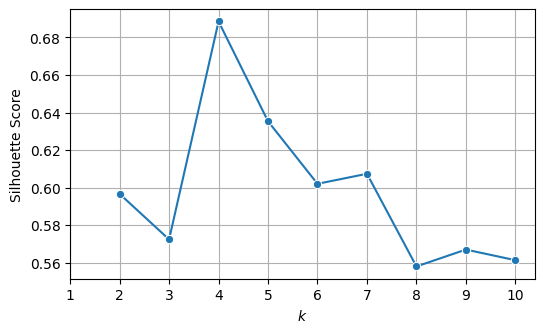

In [54]:
plt.figure(figsize=(6, 3.5))
sns.lineplot(x=range(2, 11), y=silhouette_scores, marker='o')
plt.xlabel('$k$', fontsize=10)
plt.ylabel('Silhouette Score', fontsize=10)
plt.grid(True)
plt.xticks(range(1, 11))
plt.show()

As shown, the maximum silhouette score occurs when `k=4` followed by `k=5`. This is a conclusion we couldn't get with inertia as the elbow only was observed when `k=4`.

## 4. Optimum Number of Clusters: Calinski-Harabasz Score
The score is defined as ratio of the sum of between-cluster dispersion and of within-cluster dispersion.

__Advantages:__

* The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.

* The score is fast to compute.

__Drawbacks:__

* The Calinski-Harabasz index is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained through DBSCAN.

In [55]:
from sklearn.metrics import calinski_harabasz_score

ch_scores = [calinski_harabasz_score(X, model.fit_predict(X)) for model in kmeans_models]

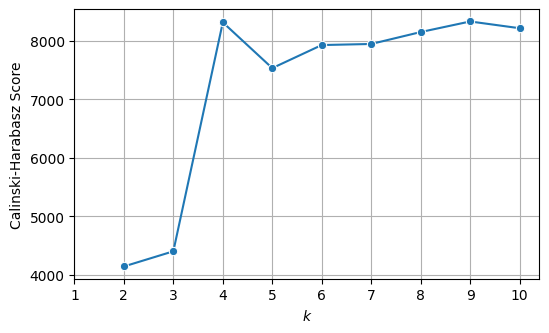

In [56]:
plt.figure(figsize=(6, 3.5))
sns.lineplot(x=range(2, 11), y=ch_scores, marker='o')
plt.xlabel('$k$', fontsize=10)
plt.ylabel('Calinski-Harabasz Score', fontsize=10)
plt.grid(True)
plt.xticks(range(1, 11))
plt.show()

## 4. Optimum Number of Clusters: Davies-Bouldin Score

The score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better score.

The minimum score is zero, with lower values indicating better clustering.

__Advantages:__

* The computation of Davies-Bouldin is simpler than that of Silhouette scores.

* The index is solely based on quantities and features inherent to the dataset as its computation only uses point-wise distances.

__Drawbacks:__

* The Davies-Boulding index is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained from DBSCAN.

* The usage of centroid distance limits the distance metric to Euclidean space.

In [57]:
from sklearn.metrics import davies_bouldin_score

db_scores = [davies_bouldin_score(X, model.fit_predict(X)) for model in kmeans_models]

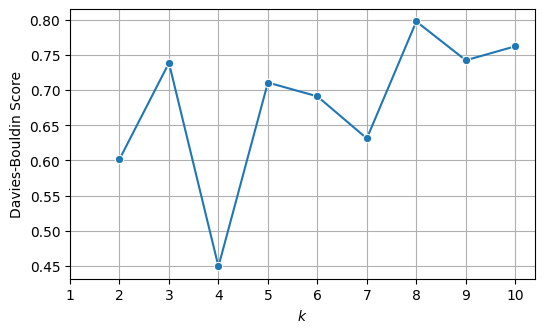

In [58]:
plt.figure(figsize=(6, 3.5))
sns.lineplot(x=range(2, 11), y=db_scores, marker='o')
plt.xlabel('$k$', fontsize=10)
plt.ylabel('Davies-Bouldin Score', fontsize=10)
plt.grid(True)
plt.xticks(range(1, 11))
plt.show()